In [1]:
#LIbraries to install
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install missingno
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=8eb155f78a562379d87113d530406afd215361c405a90d313532ba92572d7b7c
  Stored in directory: /home/jupyter-user/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


### Predicting Wine quality using Multiple Linear Regression
Steps to follow:
- Exploring and Identifying the problem
- Applying appropriate machine learning algorithm: Multiple Linear Regression
- Implementing the solution
- Evaluating and improving the model
- Analyzing the result

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

### Dataset 
We have wine data which accounts for 15% of the total portuguese production. The input data we have has following features along with the label "quality" :
- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free Sulfur dioxide
- Total Sulfir dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality

The quality score is between 0 and 10.

In [3]:
!pwd

/home/jupyter-user/predict_wine_quality_notebook


In [4]:
wine_df = pd.read_csv('/home/jupyter-user/predict_wine_quality_notebook/dataset/winequality-white.csv', sep = ';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
len(wine_df)

4898

In [6]:
# NUMBER_OF_SPLITS = 5
# for i, new_df in enumerate(np.array_split(wine_df,NUMBER_OF_SPLITS)):
#     with open(f"out{i}.csv","w") as fo:
#             fo.write(new_df.to_csv())

<AxesSubplot:>

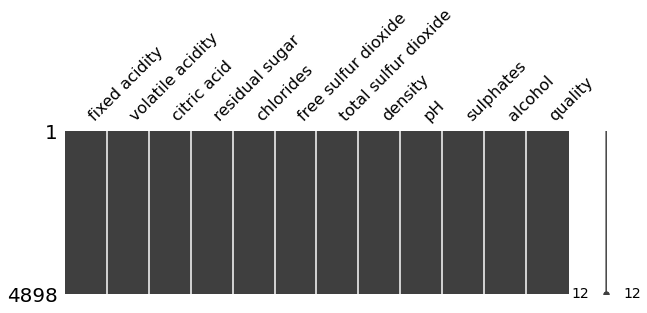

In [7]:
# Missing data detection
msno.matrix(wine_df, figsize = (10,3))

We see that all the bars in the above picture have the same height and thus, we conclude that we don't have any missing data.

### Lets see the Distribution of the data

<AxesSubplot:ylabel='quality'>

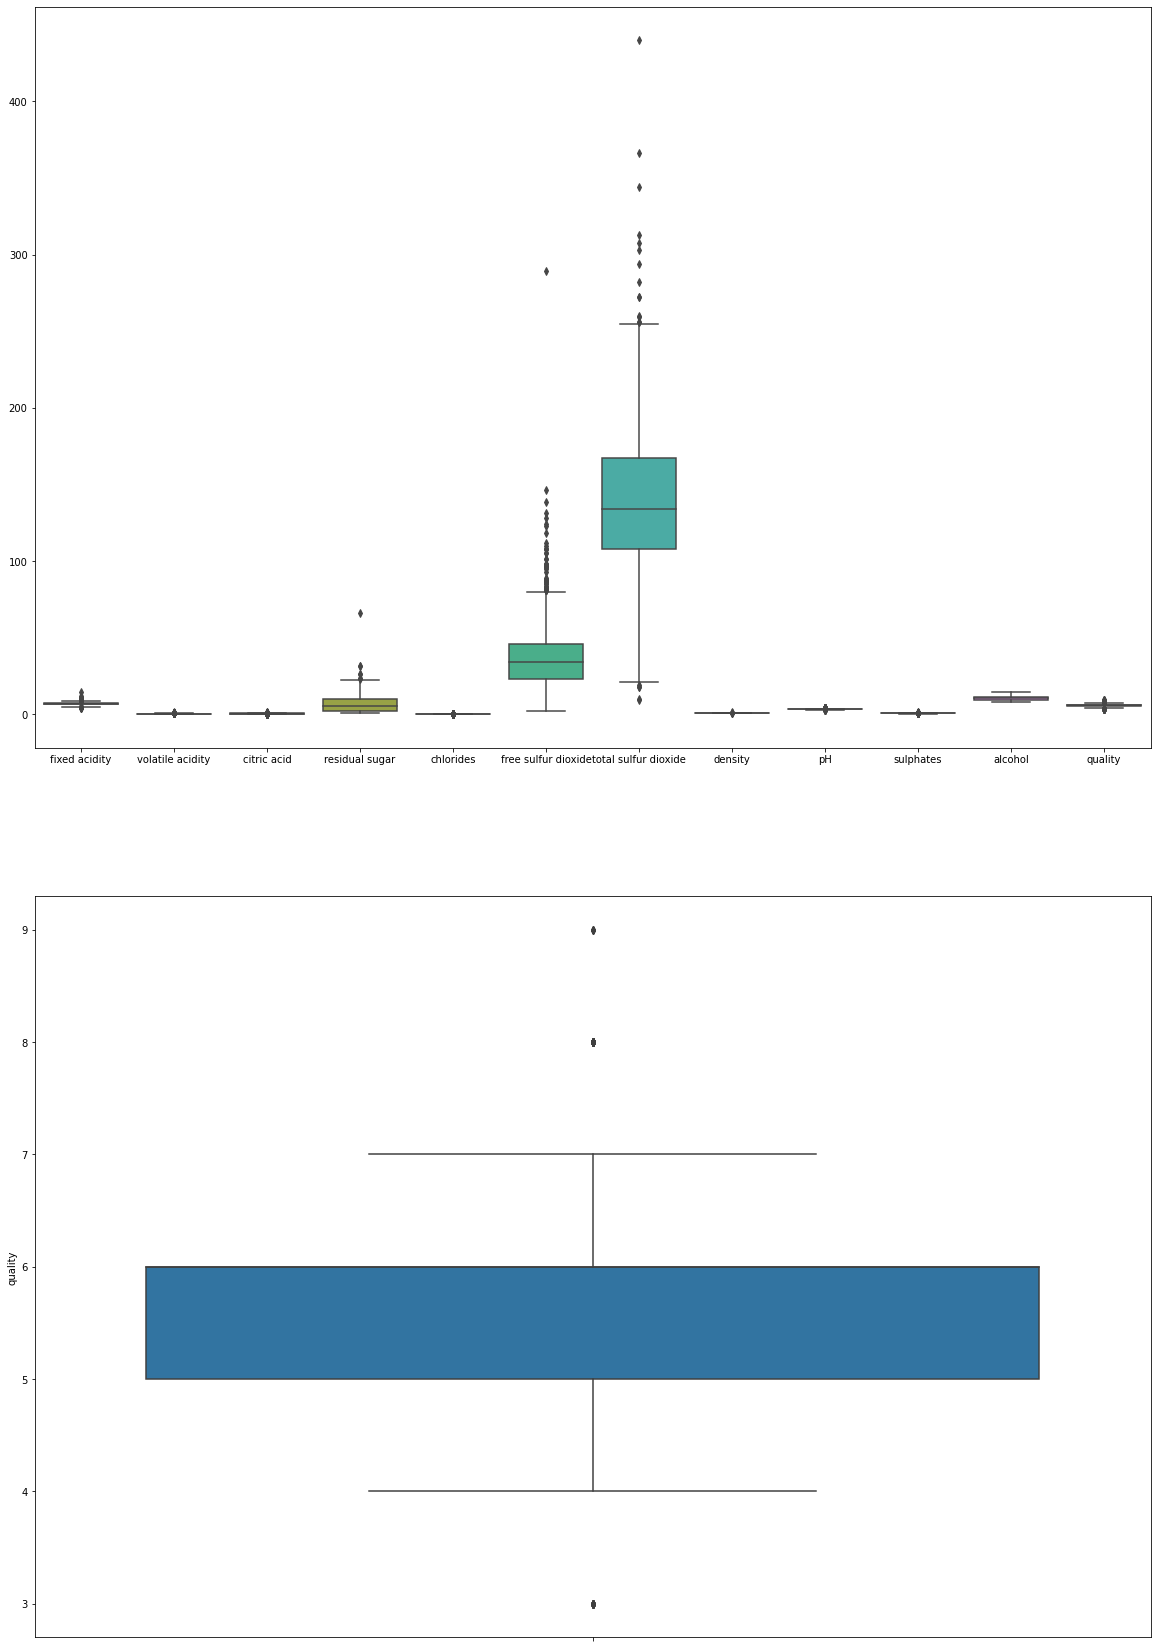

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols =1)
fig.set_size_inches(20,30)
sns.boxplot(data=wine_df,orient="v",ax=axes[0]) # To see if we need to scale our data
sns.boxplot(data=wine_df, y = "quality", orient = "pH", ax=axes[1]) # to see the distribution of quality

In the first figure, we see that there are a lot of outliers as dots in the figure. It seems that there
is a need to scale the data as we cannot see other feature values. 

In the second figure, we see that there are 3 outliers and the distribution of wine quality. Most of the feature values belong to the wine 
quality between 5 and 6. 

### Let us now see the correlation of features and then we need to remove the highly correlated features.

<AxesSubplot:>

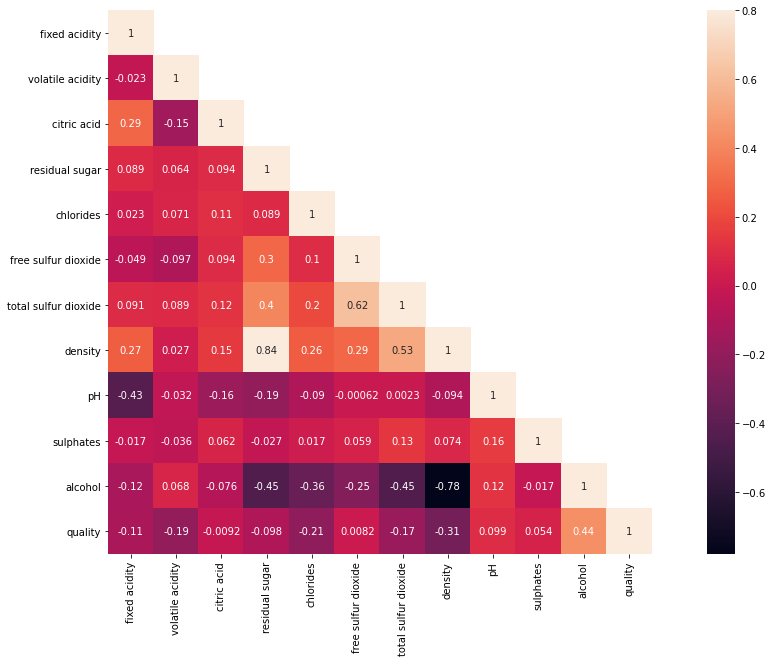

In [9]:
corr_mat = wine_df.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask = mask, vmax = 0.8, square = True, annot = True)

The density and residual sugar have high dependency.

### Splitting the data into train and test and training the model

In [10]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[: , -1]

In [11]:
## Adding an extra column for the constant used in calculation of Linear Regression
X = np.append(arr = np.ones((X.shape[0],1)), values = X, axis = 1)

In [12]:
X

array([[ 1.  ,  7.  ,  0.27, ...,  3.  ,  0.45,  8.8 ],
       [ 1.  ,  6.3 ,  0.3 , ...,  3.3 ,  0.49,  9.5 ],
       [ 1.  ,  8.1 ,  0.28, ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 1.  ,  6.5 ,  0.24, ...,  2.99,  0.46,  9.4 ],
       [ 1.  ,  5.5 ,  0.29, ...,  3.34,  0.38, 12.8 ],
       [ 1.  ,  6.  ,  0.21, ...,  3.26,  0.32, 11.8 ]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
X_train.shape

(3673, 12)

In [15]:
X_test.shape

(1225, 12)

### Scaling the data

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Building the model

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### Evaluating the model

In [18]:
r2_score(y_test, y_pred)

0.3080870771113279

### Analyzing the results with visualizations

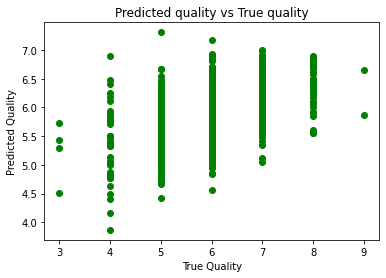

In [19]:
plt.scatter(y_test, y_pred, c ='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted quality vs True quality')
plt.show()